In [25]:
import pandas as pd
df = pd.read_csv("FimaNfipClaims.csv") #this data is flood insurance data from FEMA(Federal Emergency Management Agency)
print(df.shape)
df.head()

C:\Users\nsjhj\AppData\Local\Temp\ipykernel_26292\2754780932.py:3: DtypeWarning: Columns (7,51,66) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("FimaNfipClaims.csv")


(2713766, 73)


,agricultureStructureIndicator,asOfDate,basementEnclosureCrawlspaceType,policyCount,crsClassificationCode,dateOfLoss,elevatedBuildingIndicator,elevationCertificateIndicator,elevationDifference,baseFloodElevation,...,rentalPropertyIndicator,state,reportedCity,reportedZipCode,countyCode,censusTract,censusBlockGroupFips,latitude,longitude,id
0,0,2025-07-01T00:00:00.000Z,NaN,1,NaN,2012-10-29T00:00:00.000Z,1,NaN,NaN,NaN,...,0,NJ,Currently Unavailable,8260.0,34009.0,3.400902e+10,3.400902e+11,39.0,-74.8,88ec3df8-18a9-44f1-ae59-2bf74b5e0ea6
1,0,2025-07-01T00:00:00.000Z,NaN,1,NaN,2000-10-03T00:00:00.000Z,0,NaN,3.0,NaN,...,0,FL,Currently Unavailable,33012.0,12086.0,1.208600e+10,1.208600e+11,25.9,-80.3,f1e43e1b-fa73-49b4-a8ad-c1c6131cdbaf
2,0,2025-07-01T00:00:00.000Z,NaN,1,NaN,2010-10-29T00:00:00.000Z,0,1,NaN,NaN,...,0,FL,Currently Unavailable,33140.0,12086.0,1.208600e+10,1.208600e+11,25.8,-80.1,6b6a8942-e814-41ff-a154-730fd8e5c6cf
3,0,2025-07-01T00:00:00.000Z,NaN,1,NaN,2005-04-04T00:00:00.000Z,0,NaN,NaN,NaN,...,0,NJ,Currently Unavailable,7442.0,34031.0,3.403120e+10,3.403120e+11,41.0,-74.3,05c7646e-6bd6-4fec-a540-4c4b1c25fb1a
4,0,2025-07-01T00:00:00.000Z,0.0,1,NaN,2017-08-25T00:00:00.000Z,0,NaN,NaN,NaN,...,0,TX,Currently Unavailable,77517.0,48167.0,4.816772e+10,4.816772e+11,29.4,-95.1,2a5b1f9b-70cf-471d-a128-bdb74c571f1b


In [26]:
#we don't need all of the features
df_selected = df[['id', 'reportedZipCode', 'dateOfLoss', 'amountPaidOnBuildingClaim', 'amountPaidOnContentsClaim', 'yearOfLoss']]
df_selected = df_selected.dropna()
df_selected = df_selected[df_selected['yearOfLoss'] >= 2020]  # 5 years only
df_selected.head()

,id,reportedZipCode,dateOfLoss,amountPaidOnBuildingClaim,amountPaidOnContentsClaim,yearOfLoss
8,d1eb6e97-0e01-4435-a409-d4dfbb5bebbf,7016.0,2021-09-01T00:00:00.000Z,6049.73,472.17,2021
9,abc92188-2590-4e57-bf59-22f4ddf93d18,63130.0,2022-07-26T00:00:00.000Z,0.00,0.00,2022
13,364b834e-b2de-463f-b3a6-ec101c7e38fb,70357.0,2021-08-29T00:00:00.000Z,17700.00,7400.00,2021
26,74b0ccf9-cef3-4c1e-a327-66779ff56193,70358.0,2021-08-29T00:00:00.000Z,15684.08,0.00,2021
30,33b8ac7e-91e9-4216-8ffd-729080476307,93422.0,2023-01-10T00:00:00.000Z,0.00,0.00,2023


In [32]:
#We need to fix zipcode : 7016.0	--> 5 digits, or zipcode such as '70068-2122'
#Changed 7016.0 to 7016, , fill 0 for 5 digit 
df_selected['reportedZipCode'] = df_selected['reportedZipCode'].astype(float).astype(int).astype(str)
# if there is zipcode like '70068-2122', split 
df_selected['reportedZipCode'] = df_selected['reportedZipCode'].str.split('-').str[0]
# add 0 if there are 4 digits only. 7016.0 --> 07016
df_selected['reportedZipCode'] = df_selected['reportedZipCode'].str.zfill(5)
df_selected['reportedZipCode'][:10]

8     07016
9     63130
13    70357
26    70358
30    93422
42    33702
43    79904
48    34285
54    34652
64    32507
Name: reportedZipCode, dtype: object

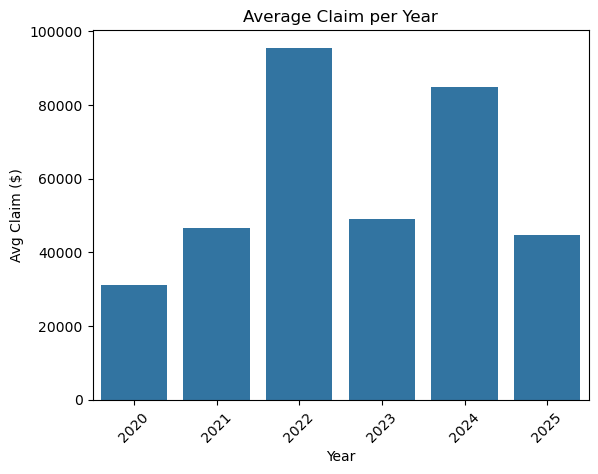

In [37]:
df_selected['totalClaim'] = df_selected['amountPaidOnBuildingClaim'] + df_selected['amountPaidOnContentsClaim']
yearly_avg = df_selected.groupby('yearOfLoss')['totalClaim'].mean().reset_index()
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=yearly_avg, x='yearOfLoss', y='totalClaim')
plt.title('Average Claim per Year')
plt.ylabel('Avg Claim ($)')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.show()


In [40]:
zip_avg = df_selected.groupby('reportedZipCode')['totalClaim'].mean().sort_values(ascending=False).head(10)
zip_avg
#11368 is new york queens 

reportedZipCode
11368    710532.420000
41721    700000.000000
25922    675047.120000
18321    600000.000000
19732    540020.308571
98144    514987.760000
44636    511838.540000
33910    506365.150000
72687    500000.000000
63383    500000.000000
Name: totalClaim, dtype: float64

In [44]:
df_selected[df_selected['reportedZipCode'] == '11368']['totalClaim'].describe()
#so one event became the average


count         1.00
mean     710532.42
std            NaN
min      710532.42
25%      710532.42
50%      710532.42
75%      710532.42
max      710532.42
Name: totalClaim, dtype: float64

In [66]:
#now we will randomly generate id from 20
import numpy as np

sample_ids = df_selected['id'].dropna().unique()[:20]

payment_data = { 'policy_id' : sample_ids, 'payment_date':pd.date_range(start='2020-01-01', periods=20, freq='20D'),
                'expected_payment': np.random.randint(500, 1500, size=20), 
                'amount_paid': np.random.randint(400, 1600, size=20),
                'nsf_signal' : np.random.choice([0, 1], size=20, p=[0.85, 0.15]), #15% for nsf                                        
                #non-sufficient funds: 1 when nsf, 0 when no nsf
                'noc_signal': np.random.choice([0, 1], size=20, p=[0.9, 0.1]), #5% chance for noc
                #Notice of Correction: wrong account info, inccorect name
                'refund_signal': np.random.choice([0, 1], size=20, p=[0.8, 0.2])  # 20% chance for refund                
}

#Refund amount calculation
#change dictionary → DataFrame
df_payment = pd.DataFrame(payment_data)

refund_amount = []
for i in range(len(df_payment)):
    expected = df_payment.loc[i, 'expected_payment']
    paid = df_payment.loc[i, 'amount_paid']
    refund_signal = df_payment.loc[i, 'refund_signal']
    if refund_signal == 1 and paid > expected:
        refund = paid - expected
    else:
        refund = 0

    refund_amount.append(refund)

df_payment['refund_amount'] = refund_amount


print(df_payment)


                               policy_id payment_date  expected_payment  \
0   d1eb6e97-0e01-4435-a409-d4dfbb5bebbf   2020-01-01              1267   
1   abc92188-2590-4e57-bf59-22f4ddf93d18   2020-01-21               828   
2   364b834e-b2de-463f-b3a6-ec101c7e38fb   2020-02-10              1234   
3   74b0ccf9-cef3-4c1e-a327-66779ff56193   2020-03-01               556   
4   33b8ac7e-91e9-4216-8ffd-729080476307   2020-03-21               556   
5   368a3837-4902-414b-8447-7db033f06a0e   2020-04-10               949   
6   2ca83473-e2b2-4772-acbb-1ee4406d3b24   2020-04-30               561   
7   213aa23e-12e7-4b61-b6f6-35dd1301ca69   2020-05-20              1372   
8   1eb5643a-9258-4534-a04b-fa1300a26155   2020-06-09               755   
9   6c32d1d5-0da4-49e4-b0af-0919e231c1b7   2020-06-29               543   
10  2eff5919-7bfb-4dad-aa42-51b86bc08d0e   2020-07-19              1498   
11  2bc47379-914f-451d-9bb3-f82fd115047e   2020-08-08              1238   
12  d2bc868a-b70a-4be3-ba

In [77]:
#merge with real data Left = id from df_selected
merged_df = df_selected.merge(df_payment, left_on='id', right_on='policy_id')

#Analysis

overpaid_no_refund = df_payment[(df_payment['amount_paid'] > df_payment['expected_payment']) & (df_payment['refund_signal'] == 0)]

# Refunded but it was not overpaid
refunded_without_overpay = df_payment[(df_payment['refund_signal'] == 1) & (df_payment['amount_paid'] <= df_payment['expected_payment'])]

# Overpaid but no refund
total_unrefunded_overpay = (overpaid_no_refund['amount_paid'] - overpaid_no_refund['expected_payment']).sum()

# number of nsf
nsf_count = df_payment['nsf_signal'].sum()

# NOC rate
noc_rate = df_payment['noc_signal'].mean() * 100


refund_percentage = df_payment['refund_amount'].sum() / df_payment['amount_paid'].sum() * 100

# There is a claim, paid less than expected or insufficent fund. 
suspicious = merged_df[
    (merged_df['totalClaim'] > 0) & ( (merged_df['amount_paid'] < merged_df['expected_payment']) | (merged_df['nsf_signal'] == 1) )  ]


In [79]:
summary = pd.DataFrame({
    'Indicator': ['# of Overpaid without Refund', '# of Refunded without Overpay', 'Total Overpaid (no refund)','NSF Cases','NOC Rate (%)'
                 ,'Refund Percentage (%)', '# of Suspicious Cases'],
    'Value': [len(overpaid_no_refund),len(refunded_without_overpay),total_unrefunded_overpay,nsf_count,round(noc_rate, 2), refund_percentage,
        len(suspicious)
    ]
})

summary


,Indicator,Value
0,# of Overpaid without Refund,9.00000
1,# of Refunded without Overpay,3.00000
2,Total Overpaid (no refund),3313.00000
3,NSF Cases,1.00000
4,NOC Rate (%),10.00000
5,Refund Percentage (%),3.85867
6,# of Suspicious Cases,7.00000


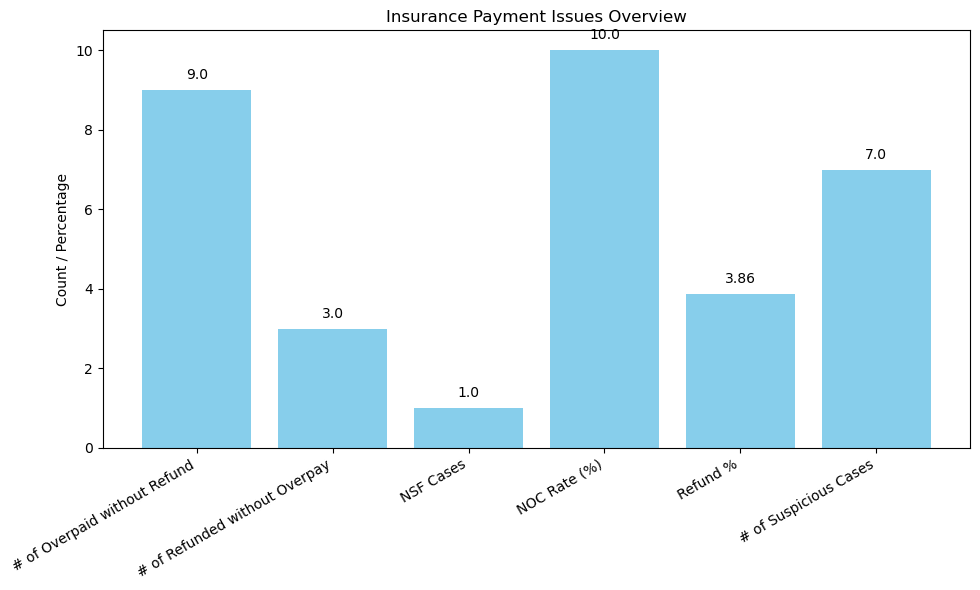

In [80]:
#Visualization
import matplotlib.pyplot as plt

labels = [
    '# of Overpaid without Refund',
    '# of Refunded without Overpay',
    'Total Overpaid (no refund)',
    'NSF Cases',
    'NOC Rate (%)',
    'Refund %',
    '# of Suspicious Cases'
]

values = [9, 3, 3313, 1, 10.0, 3.86, 7]

plt.figure(figsize=(10, 6))
bars = plt.bar(labels[:2] + labels[3:], values[:2] + values[3:], color='skyblue')
plt.title("Insurance Payment Issues Overview")
plt.ylabel("Count / Percentage")
plt.xticks(rotation=30, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.2, f'{yval}', ha='center', va='bottom')

plt.tight_layout()
plt.show()
